In [1]:
# This was just an example of a code, writing it in Jupyter for the first time
print("Hello, Jupyter, aka Balatro Flush Planet Card")

Hello, Jupyter, aka Balatro Flush Planet Card


### Task 1: Load and Explore the Dataset

* Choose a dataset in CSV format (for example, you can use datasets like the Iris dataset, a sales dataset, or any dataset of your choice).
* Load the dataset using pandas.
* Display the first few rows of the dataset using .head() to inspect the data.
* Explore the structure of the dataset by checking the data types and any missing values.
* Clean the dataset by either filling or dropping any missing values.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Students-Social-Media-Addiction.csv')
first_five_rows = df.head(5)
print(first_five_rows)

   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship_Status  Conflicts_Over_Soc

### Task 2: Basic Data Analysis

* Compute the basic statistics of the numerical columns (e.g., mean, median, standard deviation) using .describe().

In [3]:
print(df.dtypes)
# So, Age, Mental_Health_Score, Conflicts_Over_Social_Media and Addicted_Score are numerical columns
# We can't count Student_ID tho, coz that wouldn't make sense at all

# Ok, let's start on Age
AgeStats = df['Age'].describe()
print("Age Column Statistics:")
print(AgeStats)

MHS_Stats = df['Mental_Health_Score'].describe()
print("Mental Health Score Column Statistics:")
print(MHS_Stats)

COSM_Stats = df['Conflicts_Over_Social_Media'].describe()
print("Conflicts_Over_Social_Media Column Statistics:")
print(COSM_Stats)

AS_Stats = df['Addicted_Score'].describe()
print(("Addicted_Score Column Statistics"))
print(AS_Stats)

Student_ID                        int64
Age                               int64
Gender                           object
Academic_Level                   object
Country                          object
Avg_Daily_Usage_Hours           float64
Most_Used_Platform               object
Affects_Academic_Performance     object
Sleep_Hours_Per_Night           float64
Mental_Health_Score               int64
Relationship_Status              object
Conflicts_Over_Social_Media       int64
Addicted_Score                    int64
dtype: object
Age Column Statistics:
count    705.000000
mean      20.659574
std        1.399217
min       18.000000
25%       19.000000
50%       21.000000
75%       22.000000
max       24.000000
Name: Age, dtype: float64
Mental Health Score Column Statistics:
count    705.000000
mean       6.226950
std        1.105055
min        4.000000
25%        5.000000
50%        6.000000
75%        7.000000
max        9.000000
Name: Mental_Health_Score, dtype: float64
Conflicts_Over_S

* Perform groupings on a categorical column (for example, species, region, or department) and compute the mean of a numerical column for each group.

In [4]:
# OK, let's choose a categorcal column: Gender
# and two numerical columns: Age & Mental Health Score

groupGender = df.groupby('Gender').agg({'Age':'mean','Mental_Health_Score':'mean'})
print(groupGender)

# Well' we could go on and on with different columns
# The goal is to identify patterns of this data

groupRelationship = df.groupby(['Gender','Relationship_Status']).agg({'Age':'mean','Avg_Daily_Usage_Hours':'mean'})
print(groupRelationship)

platform_usage_conflicts = df.groupby('Most_Used_Platform').agg(
    Average_Daily_Usage_Hours=('Avg_Daily_Usage_Hours', 'mean'),
    Mean_Conflicts_Over_Social_Media=('Conflicts_Over_Social_Media', 'mean')
)

sorted_platforms = platform_usage_conflicts.sort_values(
    by='Average_Daily_Usage_Hours',
    ascending=False
)

print("\nMean Conflicts Over Social Media, Sorted by Average Daily Usage Hours:")
print(sorted_platforms)
print("-" * 50)

# groupPlatform = df.groupby(['Most_Used_Platform']).agg({'Conflicts_Over_Social_Media': 'mean'})
# print(groupPlatform)

print("\nMean Conflicts Over Social Media (only), Sorted by Average Daily Usage Hours:")
print(sorted_platforms['Mean_Conflicts_Over_Social_Media'])
print("-" * 50)

              Age  Mental_Health_Score
Gender                                
Female  19.968839             6.175637
Male    21.352273             6.278409
                                  Age  Avg_Daily_Usage_Hours
Gender Relationship_Status                                  
Female Complicated          19.882353               5.135294
       In Relationship      20.195652               5.271739
       Single               19.818182               4.818687
Male   Complicated          20.133333               4.253333
       In Relationship      21.549669               4.619205
       Single               21.290323               5.040323

Mean Conflicts Over Social Media, Sorted by Average Daily Usage Hours:
                    Average_Daily_Usage_Hours  \
Most_Used_Platform                              
WhatsApp                             6.475926   
TikTok                               5.346104   
Snapchat                             5.092308   
WeChat                               4.

* Identify any patterns or interesting findings from your analysis.

#### **Grouped by Gender**

The results show that the average female age is 19 years old, while the average male age is 21 years old.

Men show an average mental health score of 6.28, while women show an average mental health score of 6.18

#### Grouped by Relationship Status

The results show that women in a relationship used social media on an average of 5.2 hours daily, while men who were in relationship spent an average of 4.6 hours daily on social media

#### Grouped by Social Media Platform

The results show that Whatsapp is the most used platform, with both men and women spending 6.48 hours on average using it daily. Whatsapp has an average of 3.46 conflicts over social media.

### Task 3: Data Visualization

Create at least four different types of visualizations:

1. Line chart showing trends over time (for example, a time-series of sales data).
2. Bar chart showing the comparison of a numerical value across categories (e.g., average petal length per species).
3. Histogram of a numerical column to understand its distribution.
4. Scatter plot to visualize the relationship between two numerical columns (e.g., sepal length vs. petal length).

Customize your plots with titles, labels for axes, and legends where necessary.

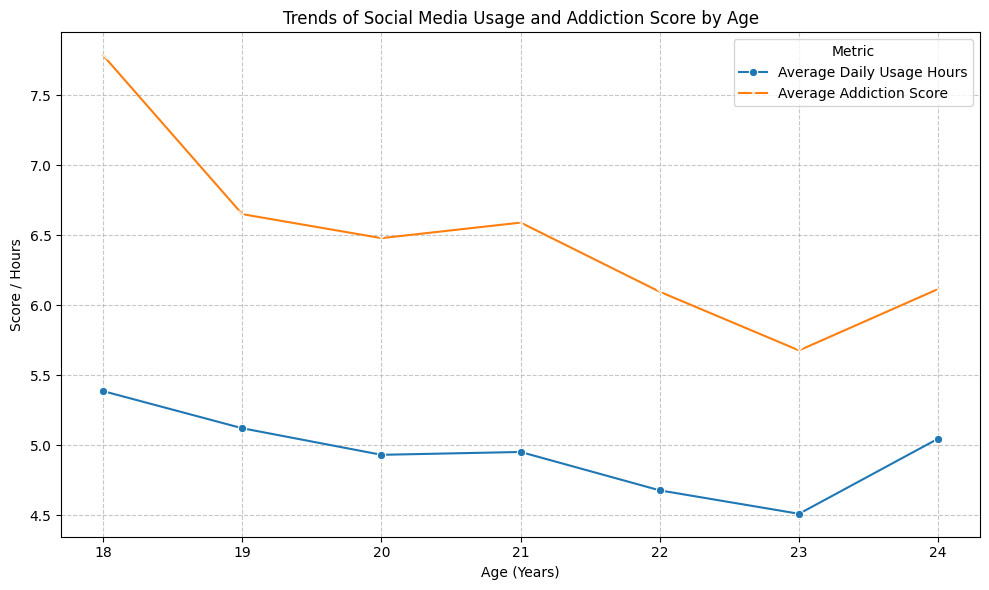

In [8]:
# Group by Age and calculate the mean of daily usage and addiction score
age_trends = df.groupby('Age').agg(
    Avg_Daily_Usage_Hours=('Avg_Daily_Usage_Hours', 'mean'),
    Avg_Addicted_Score=('Addicted_Score', 'mean')
).reset_index()

# **THIS IS THE CRUCIAL LINE:**
plt.figure(figsize=(10, 6))

sns.lineplot(data=age_trends, x='Age', y='Avg_Daily_Usage_Hours', marker='o', label='Average Daily Usage Hours')
sns.lineplot(data=age_trends, x='Age', y='Avg_Addicted_Score', marker='x', label='Average Addiction Score')
plt.title('Trends of Social Media Usage and Addiction Score by Age')
plt.xlabel('Age (Years)')
plt.ylabel('Score / Hours')
plt.xticks(age_trends['Age']) # Ensure all ages are shown as ticks
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

# print("\nLine chart generated successfully!")


C:\Users\Griffins\AppData\Local\Temp\ipykernel_14940\3527197834.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=platform_addiction, x='Most_Used_Platform', y='Addicted_Score', palette='viridis')


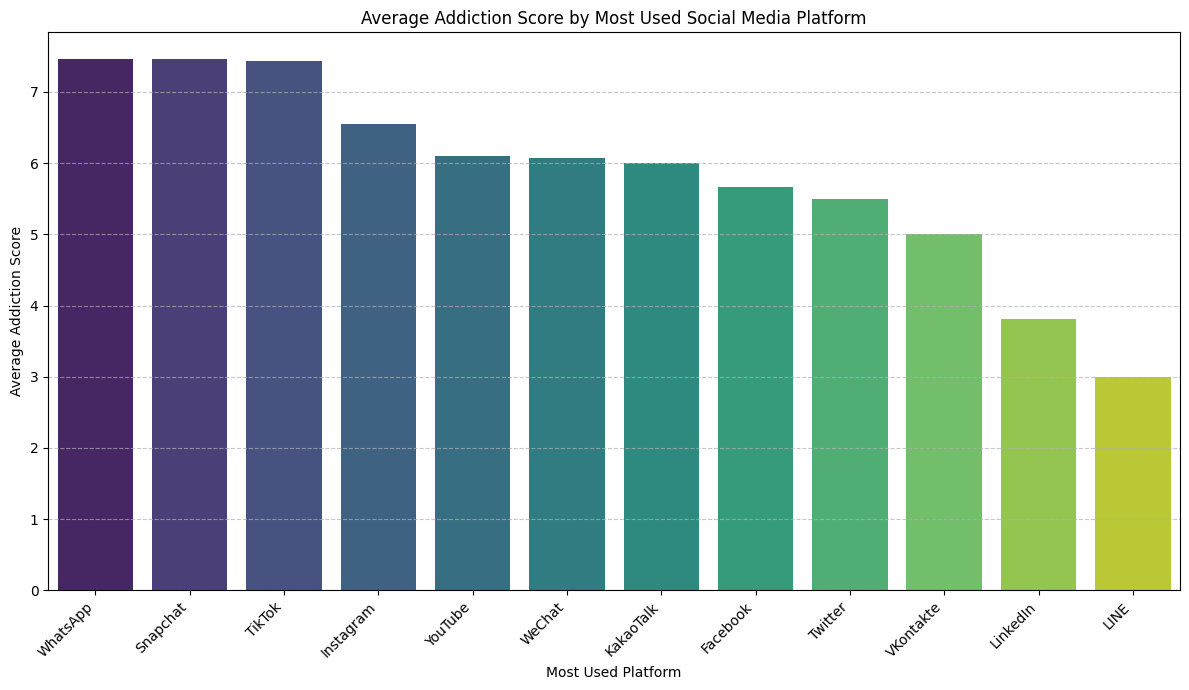

In [9]:
# --- 2. Bar Chart: Average Addiction Score by Most Used Platform ---
# Group by Most_Used_Platform and calculate the mean of Addicted_Score
platform_addiction = df.groupby('Most_Used_Platform')['Addicted_Score'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(data=platform_addiction, x='Most_Used_Platform', y='Addicted_Score', palette='viridis')
plt.title('Average Addiction Score by Most Used Social Media Platform')
plt.xlabel('Most Used Platform')
plt.ylabel('Average Addiction Score')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

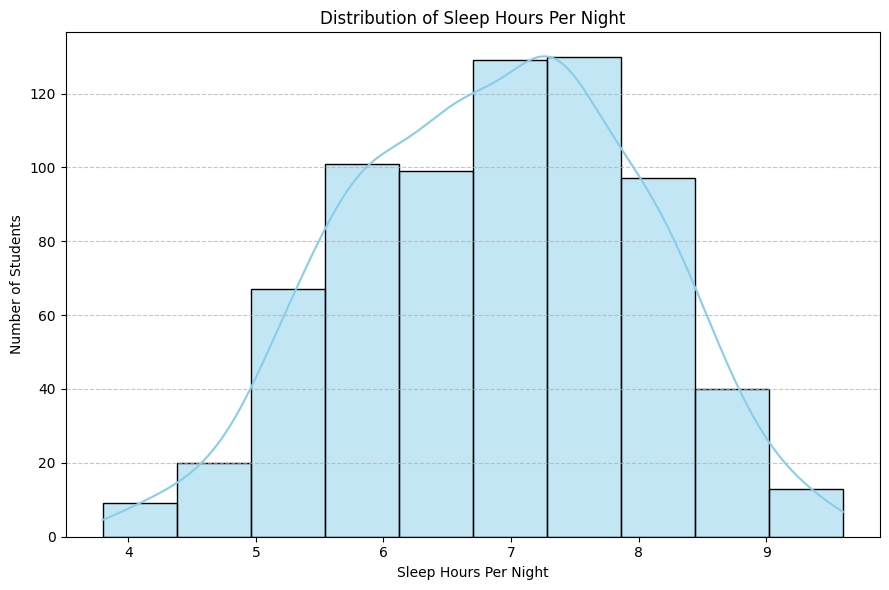

In [10]:
# --- 3. Histogram: Distribution of Sleep Hours Per Night ---
plt.figure(figsize=(9, 6))
sns.histplot(data=df, x='Sleep_Hours_Per_Night', bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Sleep Hours Per Night')
plt.xlabel('Sleep Hours Per Night')
plt.ylabel('Number of Students')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

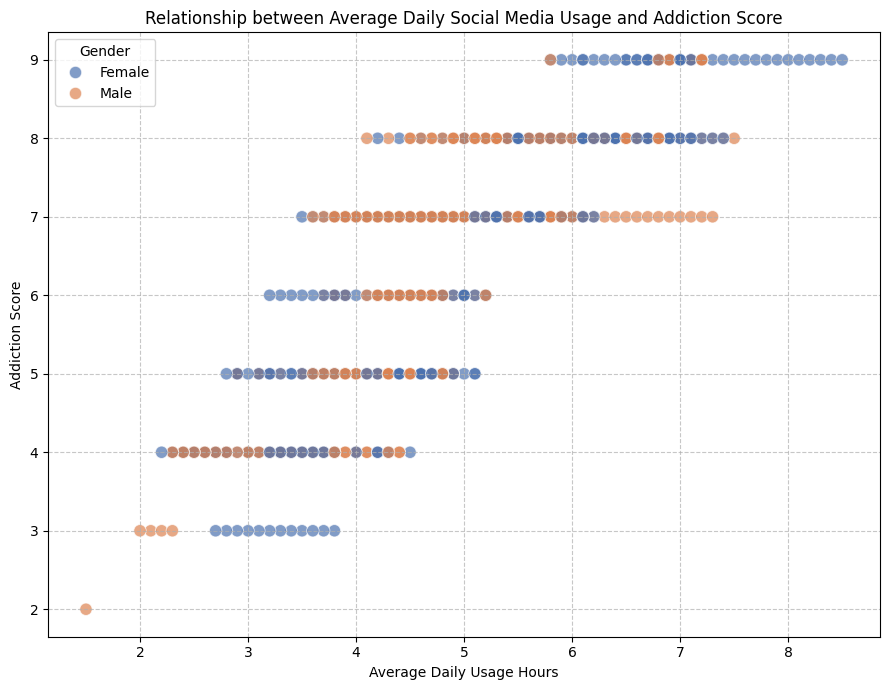

In [11]:
# --- 4. Scatter Plot: Relationship Between Avg Daily Usage Hours and Addicted Score ---
plt.figure(figsize=(9, 7))
sns.scatterplot(data=df, x='Avg_Daily_Usage_Hours', y='Addicted_Score', hue='Gender', s=80, alpha=0.7, palette='deep')
plt.title('Relationship between Average Daily Social Media Usage and Addiction Score')
plt.xlabel('Average Daily Usage Hours')
plt.ylabel('Addiction Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()